<a href="https://colab.research.google.com/github/jmccahill5/datman/blob/main/PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

In [2]:
#download file from online and save in colab CSV
!wget -q -O d.csv https://raw.githubusercontent.com/jmccahill5/datman/main/median%20HP%20vs%20Median%20IN%2072-2020.csv

In [3]:
# basic navigation
#wd =  'ex1'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
d.csv  sample_data


In [18]:
dat=pd.read_csv('d.csv') #read it in  ; or full path: '/content/ex1.csv'

In [19]:
dat.columns #list var names

Index(['Year ', 'Median HP', 'Median IN'], dtype='object')

In [6]:
dat.head(2)
dat.tail(2)

,Year,Median HP,Median IN
0,2020,336950,67521.00
1,2019,320250,68702.36


,Year,Median HP,Median IN
47,1973,32600,10512.04
48,1972,27525,9696.94


In [25]:
dat.dtypes

Year           int64
Median HP      int64
Median IN    float64
dtype: object

In [14]:
#dat.set_index(['Year '])

,Median HP,Median IN
Year,,
2020,336950,67521.00
2019,320250,68702.36
2018,325275,63179.34
2017,322425,61371.89
2016,305125,59038.75
2015,294150,56515.94
2014,285775,53656.66
2013,266225,51939.25
2012,244400,51017.21


In [ ]:
## Data includes median home prices vs median incomes from 1972- 2020
## Both have increased due to inflation and other factors, however in recent history home prices have increased at higher percentages than income has year over year

<Axes: xlabel='yr'>

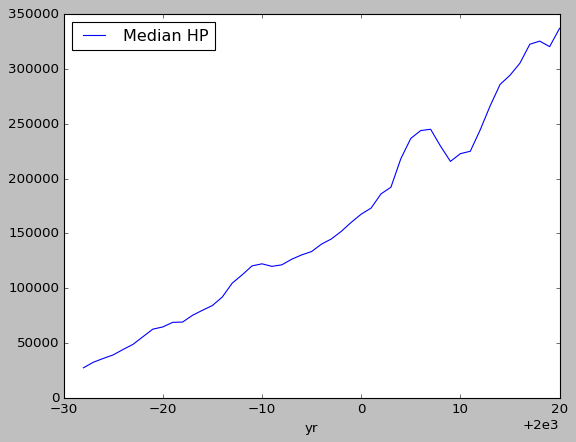

In [28]:
dat.plot(kind='line', y='Median HP',x='yr') ## How can I get my year variable to display a year?

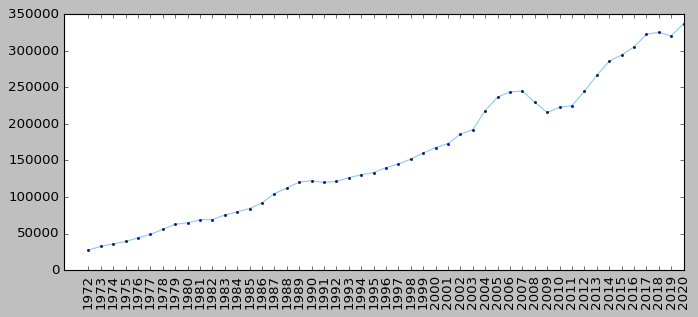

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot( 'Year ', 'Median HP', data=dat, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=1)
ax.set_xticks(ticks=dat['Year '], labels=dat['Year '],rotation=90)

<Axes: xlabel='Year '>

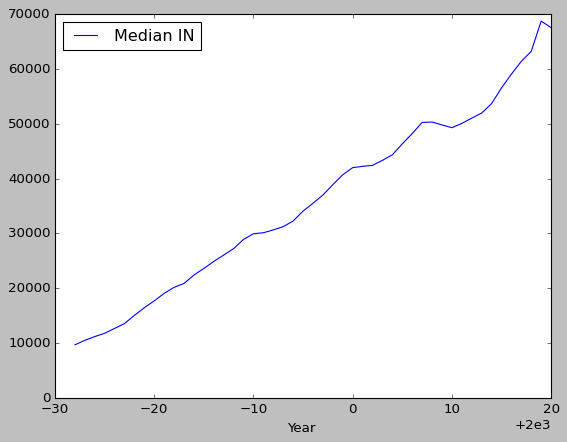

In [ ]:
dat.plot(kind='line', y='Median IN', x='Year ') ## How can I get my year variable to display a year?

In [ ]:
#HTML FROM WIKIPEDIA

pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_by_median_home_price',match='rank',flavor=None)[0].head(51)
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_by_median_home_price',match='rank',flavor=None)[0]

,State rank,State or territory,Median home price in US$[1]
0,1,Hawaii,"$636,451"
1,—,District of Columbia,"$626,911"
2,2,California,"$554,886"
3,3,Massachusetts,"$422,856"
4,4,Washington,"$409,228"
5,5,Colorado,"$397,820"
6,6,Oregon,"$361,970"
7,7,Utah,"$348,376"
8,8,New Jersey,"$335,607"
9,9,New York,"$321,934"


In [ ]:
data.dtypes

State  rank                     object
State  or territory             object
Median home price  in US$[1]    object
dtype: object

In [ ]:
data['Median home price  in US$[1]'] = data['Median home price  in US$[1]'].str.replace('$', '')

<ipython-input-13-facd5b427d52>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Median home price  in US$[1]'] = data['Median home price  in US$[1]'].str.replace('$', '')


In [ ]:
data['Median home price  in US$[1]'] = data['Median home price  in US$[1]'].str.replace(',', '')

In [ ]:
data['medHpr']=data['Median home price  in US$[1]'].astype(float)


In [ ]:
data.columns

Index(['State  rank', 'State  or territory', 'Median home price  in US$[1]'], dtype='object')

In [ ]:
data.tail(2)

,State rank,State or territory,Median home price in US$[1]
49,49,Mississippi,"$126,502"
50,50,West Virginia,"$108,236"


In [ ]:
## i was getting string variable errors when I tried to get more descriptive statistics through python.
# median price US - $329,000
# max - $636,451 Hawaii
# min - $108,236 West Virginia
# avergage - $248,991

In [ ]:
## xlsx file

In [ ]:
import openpyxl

In [ ]:
with open(r"C:\Users\jmcca\OneDrive\Desktop\statistic_id727847_rate-of-homelessness-in-the-us-by-state-2022.xlsx", 'w') as fp:
    fp.write('This is first line')
    pass

18

In [ ]:
import os

# is a file
print(os.path.isfile(r"C:\Users\jmcca\OneDrive\Desktop\statistic_id727847_rate-of-homelessness-in-the-us-by-state-2022.xlsx"))

True


In [ ]:
from openpyxl import load_workbook
load_workbook(filename=statistic_id727847_rate-of-homelessness-in-the-us-by-state-2022.xlsx)
workbook.sheetnames
['Sheet 1']

sheet = workbook.active
sheet
<Worksheet "Sheet 1">

sheet.title
'Sheet 1'

SyntaxError: ignored